# Plots of Results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
import statsmodels.api as sm
import pickle
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import splrep, splev,  splint

In [3]:
from nice_tcks import nice_ticks
import matplotlib.transforms as mpltrafo

## Variation of $\gamma$

In [260]:
inputf = np.loadtxt("data/s2_vs_gamma_pert.txt")

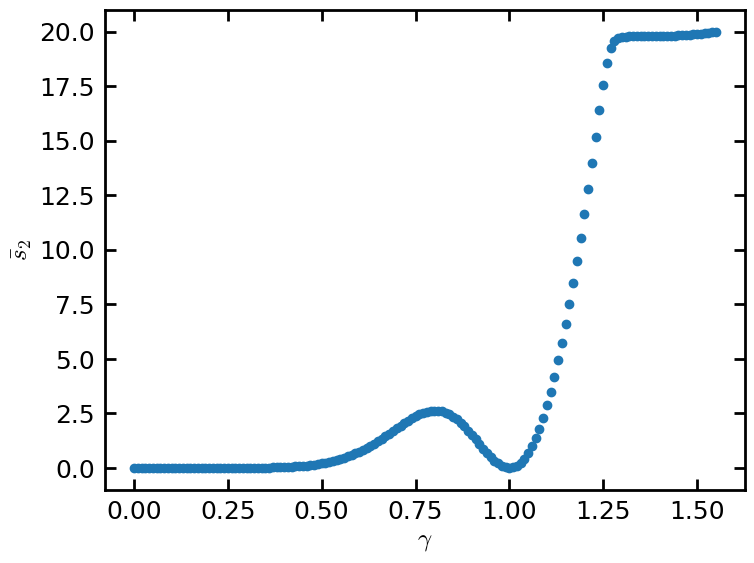

In [262]:
plt.scatter(inputf[:,0],inputf[:,2])
# plt.xlim(0,1)
# plt.ylim(0,3)
plt.xlabel("$\gamma$")
plt.ylabel("$\\bar{s}_2$")
nice_ticks()
plt.show()

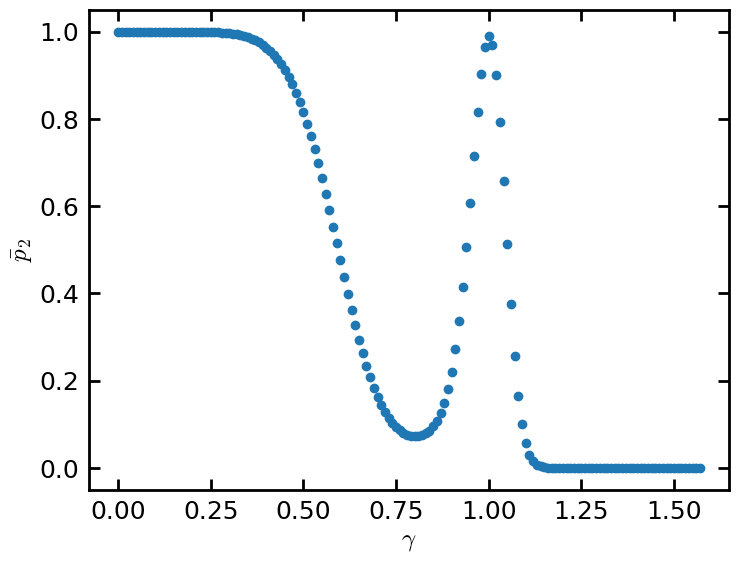

In [257]:
plt.scatter(inputf[:,0],inputf[:,1])
# plt.xlim(0,1)
# plt.ylim(0,3)
plt.xlabel("$\gamma$")
plt.ylabel("$\\bar{p}_2$")
nice_ticks()
plt.show()

## Dependence on $R_2$

perturbative regime:

In [229]:
inputf_R2_w1 = np.loadtxt("data/s2_vs_R2_R1=1.txt")
inputf_R2_w2 = np.loadtxt("data/s2_vs_R2_R1=2.txt")
inputf_R2_w3 = np.loadtxt("data/s2_vs_R2_R1=3.txt")

In [230]:
# from below:
lratio = 2.0001424050530446e-08

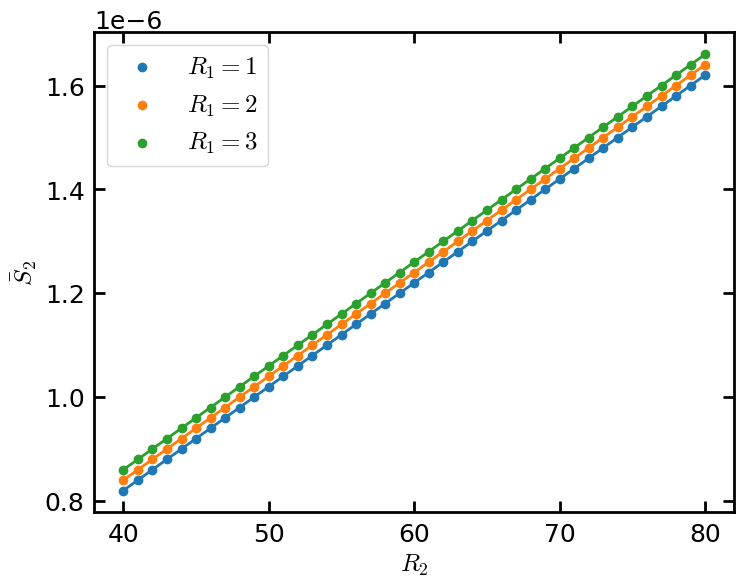

In [232]:
plt.figure(1)
plt.scatter(inputf_R2_w1[:,0],inputf_R2_w1[:,2], label="$R_1=1$")
plt.scatter(inputf_R2_w2[:,0],inputf_R2_w2[:,2], label="$R_1=2$")
plt.scatter(inputf_R2_w3[:,0],inputf_R2_w3[:,2], label="$R_1=3$")

# plt.plot(inputf_R2_w1[:,0], 1.96110964e-08+2.00014215e-08*inputf_R2_w1[:,0]) # fit below
# predictions from eigenvalue ratios below:
plt.plot(inputf_R2_w1[:,0], (inputf_R2_w1[:,0]+1)*lratio, c="C0")
plt.plot(inputf_R2_w2[:,0], (inputf_R2_w2[:,0]+2)*lratio, c="C1")
plt.plot(inputf_R2_w3[:,0], (inputf_R2_w3[:,0]+3)*lratio, c="C2")

plt.xlabel("$R_2$")
plt.ylabel("$\\bar{S}_2$")
plt.legend() # loc="best", scatterpoints=3, title="$\\alpha=1,\ \\beta=0.1,\ \\gamma=0,\ \\delta=0.95$")
nice_ticks()

plt.savefig("figures/s2_vs_R2_pert.pdf")

In [89]:
# linear fits:
fitres_w1 = Polynomial.fit(inputf_R2_w1[:,0],inputf_R2_w1[:,2],deg=1)
print(fitres_w1.convert().coef[1])
fitres_w2 = Polynomial.fit(inputf_R2_w2[:,0],inputf_R2_w2[:,2],deg=1)
print(fitres_w2.convert().coef[1])
fitres_w3 = Polynomial.fit(inputf_R2_w3[:,0],inputf_R2_w3[:,2],deg=1)
print(fitres_w3.convert().coef[1])

2.000142153928864e-08
2.0003225786403645e-08
2.000142134758922e-08


In [76]:
# Alternative:
linmodel = sm.OLS(inputf_R2_w1[:,2], sm.add_constant(inputf_R2_w1[:,0])) # y,x
res = linmodel.fit()
res.params

array([1.96110964e-08, 2.00014215e-08])

In [90]:
intercepts = [fitres_w1.convert().coef[0], fitres_w2.convert().coef[0], fitres_w3.convert().coef[0]]

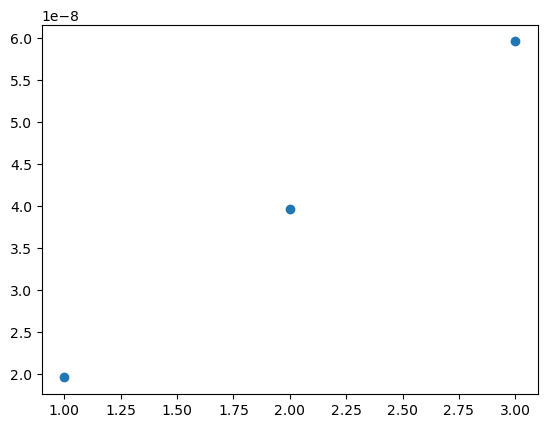

In [91]:
plt.scatter(range(1,4), intercepts)

<br>
Case $\alpha = \delta$:

In [20]:
inputf_R2_ad = np.loadtxt("data/s2_vs_R2_R1=2_alpha=delta.txt")

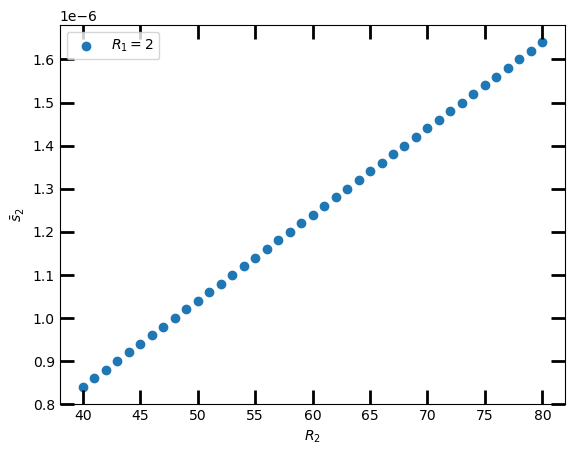

In [21]:
plt.scatter(inputf_R2_ad[:,0],inputf_R2_ad[:,2], label="$R_1=2$")

plt.xlabel("$R_2$")
plt.ylabel("$\\bar{s}_2$")
plt.legend()
nice_ticks()
plt.show()

In [22]:
fitres = Polynomial.fit(inputf_R2_ad[:,0],inputf_R2_ad[:,2],deg=1)
print(fitres.convert().coef[1])

2.000413631816554e-08


<br>
nonperturbative regime:

In [23]:
inputf_R2_nonpert = np.loadtxt("data/s2_vs_R2_nonpert.txt")

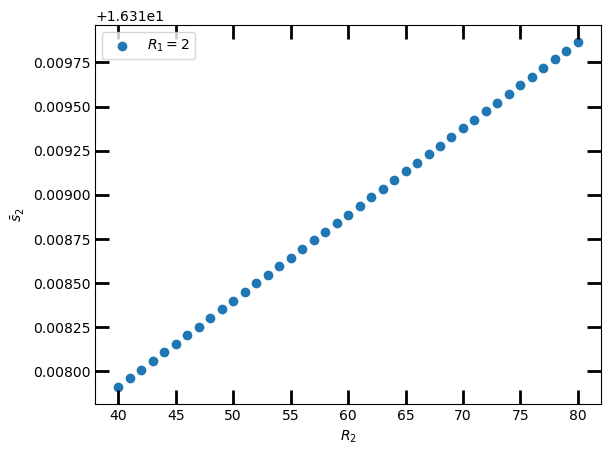

In [24]:
plt.scatter(inputf_R2_nonpert[:,0],inputf_R2_nonpert[:,2], label="$R_1=2$")
plt.xlabel("$R_2$")
plt.ylabel("$\\bar{s}_2$")
plt.legend()
nice_ticks()
plt.show()

In [25]:
fitres = Polynomial.fit(inputf_R2_nonpert[:,0],inputf_R2_nonpert[:,2],deg=1)
print(fitres.convert().coef[1])

4.886855222579012e-05


## Variation of $\delta$

$\gamma = 0$, perturbative regime:

In [214]:
file = open("data/s2_vs_delta_pert.p", "rb")
grid_delta = pickle.load(file)
file.close()

In [215]:
grid_delta['info']

'[Nx,Ny,R1,R2,a,b] = [4, 100, 2, 60, 1.0, 0.1]'

In [216]:
grid_delta.keys()

dict_keys(['info', 'gamma_vals', 'delta_vals', 'p2', 's2'])

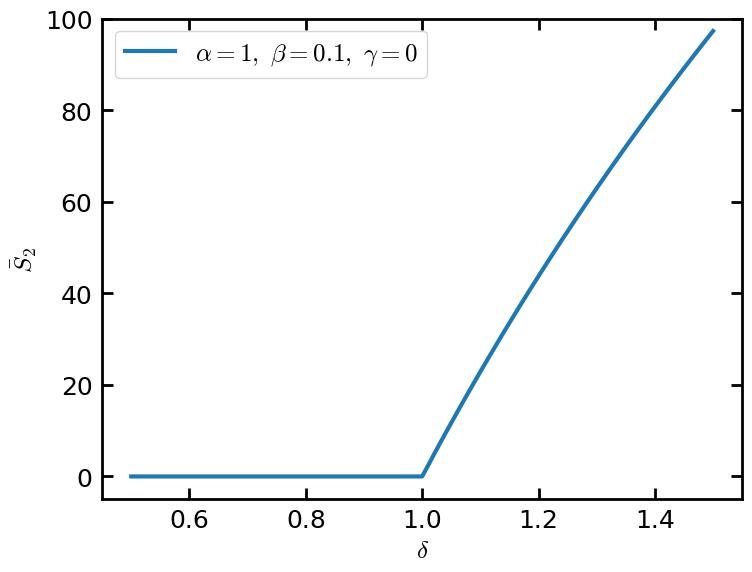

In [235]:
plt.figure(2)

plt.plot(grid_delta['delta_vals'], grid_delta['s2'][0], label="$\\alpha=1,\ \\beta=0.1,\ \\gamma=0$", lw=3)
plt.ylim(top=100)
plt.xlabel("$\\delta$")
plt.ylabel("$\\bar{S}_2$")
plt.legend()
nice_ticks()

plt.savefig("figures/s2_vs_delta_pert_single.pdf")

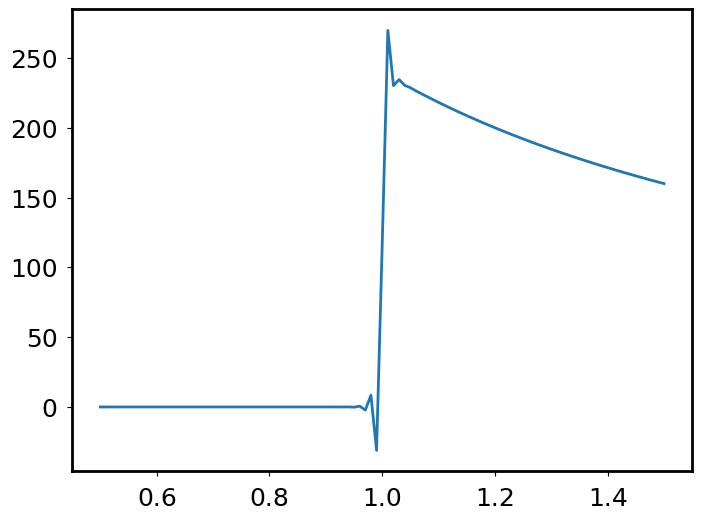

In [254]:
## Derivative:

## minimal example:
# x=np.linspace(0, 2.0*np.pi,200)
# x_eval = np.linspace(-np.pi,3.0*np.pi,300)
# f=np.sin(x)
# tck = splrep(x, f, k=5)
# g=splev(x_eval, tck, der=1)
# plt.plot(x,f)
# plt.plot(x_eval,g, label='splev', ls='', marker='s')
# plt.legend()
# plt.show()

s2_tck = splrep(grid_delta['delta_vals'], grid_delta['s2'][0], k=3)
s2_spl = splev(grid_delta['delta_vals'], s2_tck, der=1)
plt.plot(grid_delta['delta_vals'], s2_spl)
plt.show()

## Dependence of eigenvalues on $R_1$

perturbative example:

In [49]:
run Entropies_numerical_eigenvalues.py

l1...l4 num:     [0.02   0.     1.     0.9025]
l1...l4 analyt:  [1.0, 0.9024999999999999, 0.020000000000000004, 0.0]
perm possible:  [array([2]), array([3]), 0, 1]
perm taken:  [2, 3, 0, 1]
all elems in perm:                 True
Schur decomposition tau0=V*L*V.T:  True
V is orthogonal:                   True
V is correctly ordered:            True
Tr[M1*M1.T] =  1.0
Tr[M1*M2.T] =  0.0
... calculating E2

R1 =  1
... calculating E2p

R1 =  2
... calculating E2p

R1 =  3
... calculating E2p


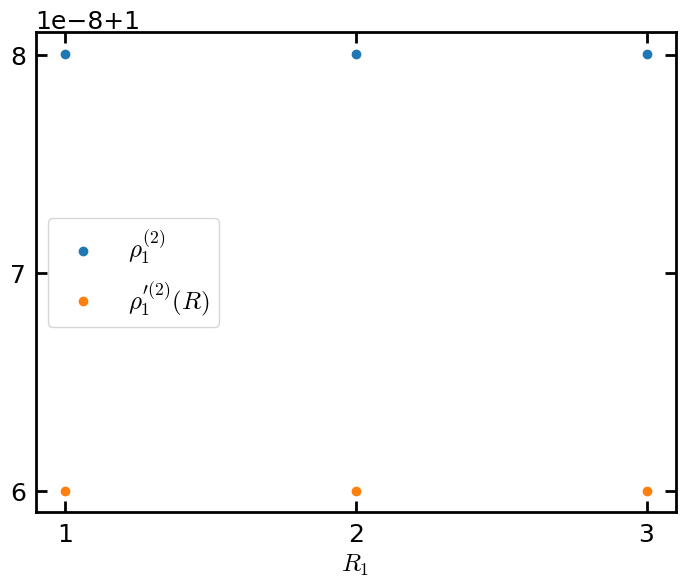

In [62]:
plt.figure(100)
ax = plt.subplot(111)
plt.scatter(R1_vals, rho2_dom[0]*np.ones(len(R1_vals)), label="$\\rho_1^{(2)}$")
plt.scatter(R1_vals, rho2p_dom[:,0], label="$\\rho_1^{\\prime(2)}(R)$")
plt.xlabel("$R_1$")
ax.set_xticks([1,2,3])
ax.set_yticks(np.array([6,7,8])*1e-8+1)
plt.legend(loc="center left")
nice_ticks()

plt.savefig("figures/eigenvalues_pert.pdf")

In [60]:
lratio = -np.log(rho2p_dom[0,0]/rho2_dom[0])
lratio

2.0001424050530446e-08

In [41]:
# first order in analytics not yet matching:
-np.log((1+0.95**8) / (1+0.95**16+2*0.95**8))

0.5088759832248355

<br>
nonperturbative case:

l1...l4 num:     [-0.95079968  1.05079968  0.02        0.        ]
l1...l4 analyt:  [1.0507996802557444, -0.9507996802557444, 0.020000000000000004, 0.0]
perm possible:  [array([1]), array([0]), 2, 3]
perm taken:  [1, 0, 2, 3]
all elems in perm:                 True
Schur decomposition tau0=V*L*V.T:  True
V is orthogonal:                   True
V is correctly ordered:            True
Tr[M1*M1.T] =  0.9999999999999999
Tr[M1*M2.T] =  0.0
... calculating E2

R1 =  1
... calculating E2p

R1 =  2
... calculating E2p

R1 =  3
... calculating E2p


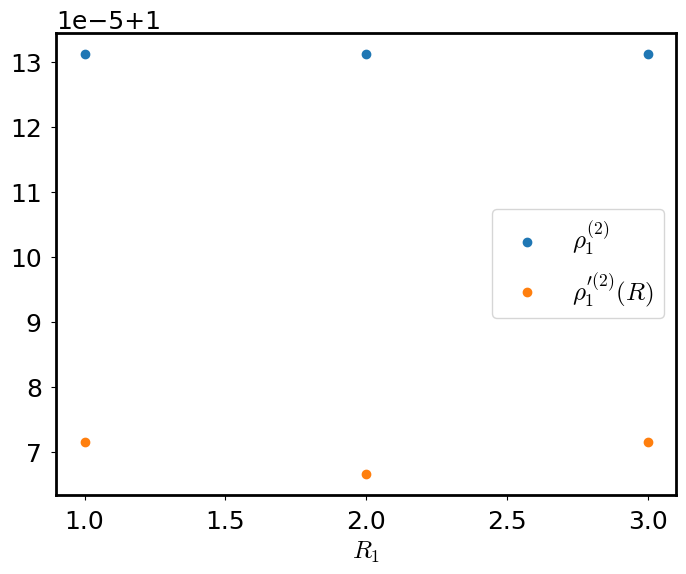

In [30]:
run Entropies_numerical_eigenvalues.py

## Parameter grid

perturbative regime

In [4]:
file = open("data/s2_vs_delta_gamma_pert.p", "rb")
grid_pert = pickle.load(file)
file.close()

In [5]:
grid_pert['info']

'[Nx,Ny,R1,R2,a,b] = [4, 100, 2, 60, 1.0, 0.1]'

In [36]:
g,d = np.meshgrid(grid_pert['gamma_vals'], grid_pert['delta_vals'])

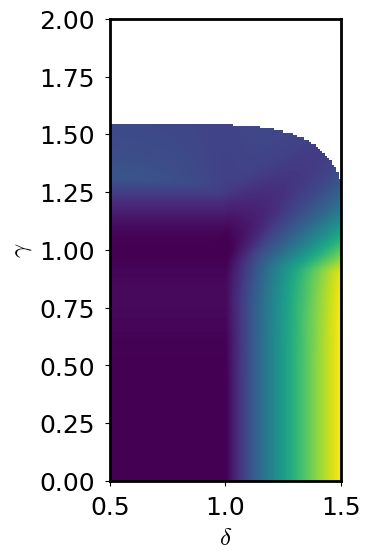

In [37]:
fig = plt.figure()
plt.imshow(grid_pert['s2'], origin='lower', extent=[0.5,1.5,0,2])
plt.xlabel("$\\delta$")
plt.ylabel("$\\gamma$")
plt.show()

In [6]:
# fig1 = plt.figure()
# ax = fig1.add_subplot(111, projection='3d')
# x,y = np.meshgrid(grid_pert['gamma_vals'], grid_pert['delta_vals'])
# ax.scatter(x, y, grid_pert['s2'].T)
# plt.show()

/Users/Johannes/anaconda3/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


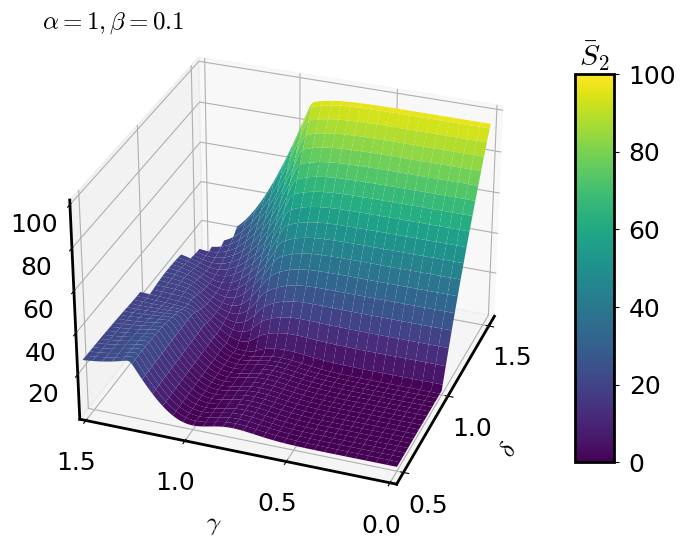

In [87]:
# plt.figure(4, figsize=(8,8))

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax.plot_surface(d, g, grid_pert['s2'].T, cmap='viridis', vmin=0, vmax=100)
ax.view_init(azim=200)
plt.xlabel("$\\delta$",labelpad=17)
plt.ylabel("$\\gamma$",labelpad=15)
ax.set_xticks([0.5,1,1.5])
ax.set_yticks([0,0.5,1,1.5])
# ax.set_zlabel("$S_2$")
plt.ylim(0,1.5)
ax.set_zlim(top=100)
fig.set_figwidth(7)
# fig.set_figheight(7)

clb = fig.colorbar(surf, shrink=0.7, aspect=10, pad=0.05) #, label="$\\bar{s}_2$")
clb.ax.set_title("$\\bar{S}_2$")
# ax.set_position(mpltrafo.Bbox([[-0.05, 0.05], [0.8, 1.05]]))
plt.tight_layout(pad=0.9)
# plt.rcParams["figure.autolayout"] = True
fig.text(0.05,0.9, "$\\alpha=1, \\beta=0.1$")
# clb = fig.colorbar(surf, shrink=0.7, aspect=10, pad=0.1) #, label="$\\bar{s}_2$")
# clb.ax.set_title("$\\bar{S}_2$")

plt.savefig("figures/s2_vs_delta_gamma_pert.pdf")

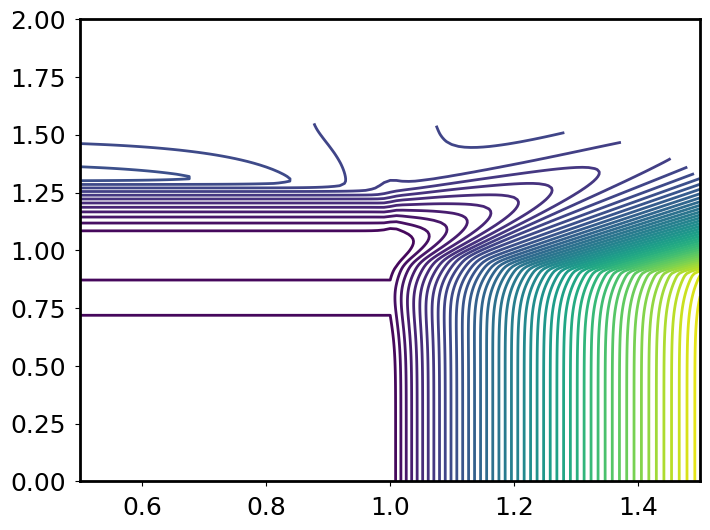

In [39]:
plt.contour(d, g, grid_pert['s2'].T, levels=np.linspace(0,100))

<br>
nonperturbative regime:

In [40]:
file = open("data/s2_vs_delta_gamma_nonpert.p", "rb")
grid_nonpert = pickle.load(file)
file.close()

In [41]:
grid_nonpert['info']

'[Nx,Ny,R1,R2,a,b] = [4, 100, 2, 60, 1.0, 1.0]'

In [43]:
g,d = np.meshgrid(grid_nonpert['gamma_vals'], grid_nonpert['delta_vals'])

/Users/Johannes/anaconda3/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


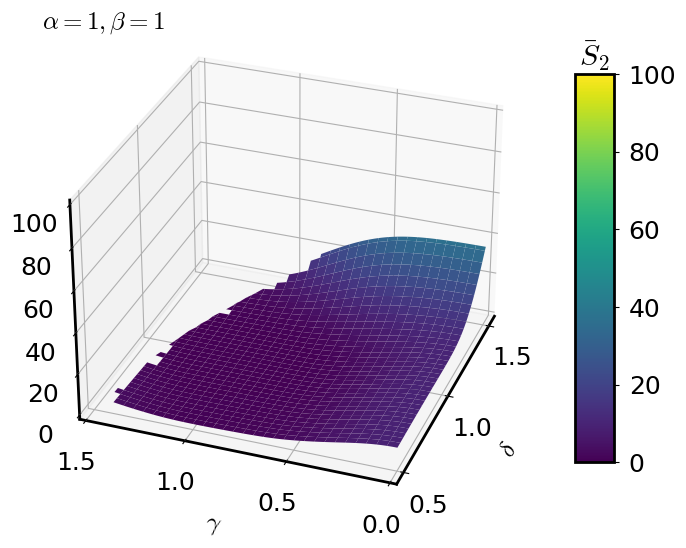

In [86]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax.plot_surface(d, g, grid_nonpert['s2'].T, cmap='viridis', vmin=0, vmax=100)
ax.view_init(azim=200)
plt.xlabel("$\\delta$",labelpad=17)
plt.ylabel("$\\gamma$",labelpad=15)
ax.set_xticks([0.5,1,1.5])
ax.set_yticks([0,0.5,1,1.5])
plt.ylim(0,1.5)
ax.set_zlim(top=100)
fig.set_figwidth(7)
clb = fig.colorbar(surf, shrink=0.7, aspect=10, pad=0.05)
clb.ax.set_title("$\\bar{S}_2$")
fig.text(0.05,0.9, "$\\alpha=1, \\beta=1$")
plt.tight_layout(pad=0.9)
plt.savefig("figures/s2_vs_delta_gamma_nonpert.pdf")

<br>
grid:

/Users/Johannes/anaconda3/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


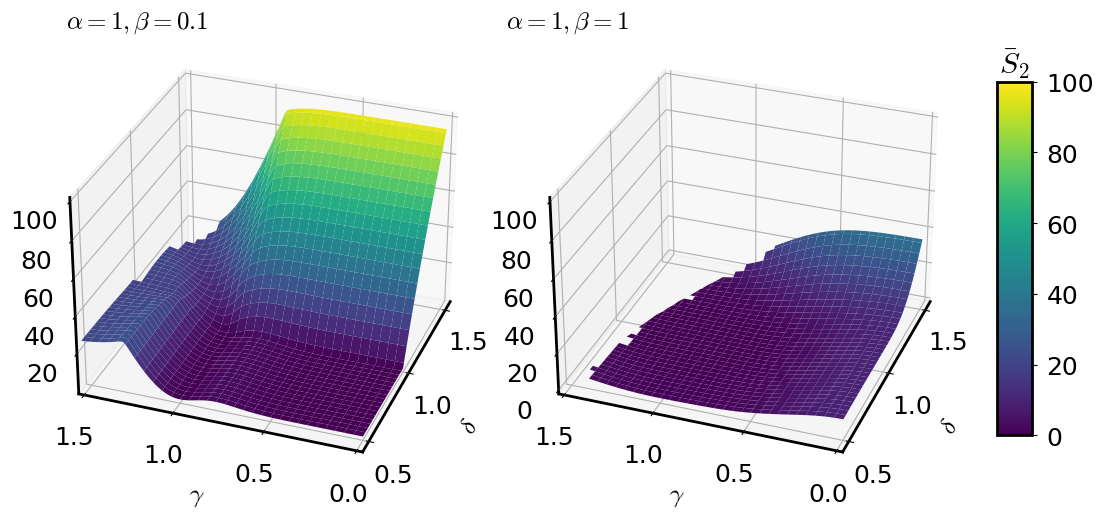

In [148]:
fig, axs = plt.subplots(1,2, figsize=(11,5.5), subplot_kw={'projection':'3d'})

surf1 = axs[0].plot_surface(d, g, grid_pert['s2'].T, cmap='viridis', vmin=0, vmax=100)
axs[0].view_init(azim=200)
axs[0].set_xlabel("$\\delta$",labelpad=17)
axs[0].set_ylabel("$\\gamma$",labelpad=15)
axs[0].set_xticks([0.5,1,1.5])
axs[0].set_yticks([0,0.5,1,1.5])
axs[0].set_ylim(0,1.5)
axs[0].set_zlim(top=100)
fig.text(0.05,0.92, "$\\alpha=1, \\beta=0.1$")

surf2 = axs[1].plot_surface(d, g, grid_nonpert['s2'].T, cmap='viridis', vmin=0, vmax=100)
axs[1].view_init(azim=200)
axs[1].set_xlabel("$\\delta$",labelpad=17)
axs[1].set_ylabel("$\\gamma$",labelpad=15)
axs[1].set_xticks([0.5,1,1.5])
axs[1].set_yticks([0,0.5,1,1.5])
axs[1].set_ylim(0,1.5)
axs[1].set_zlim(top=100)
fig.text(0.45,0.92, "$\\alpha=1, \\beta=1$")

plt.tight_layout(pad=0.9)
fig.subplots_adjust(right=1.05)
clb = fig.colorbar(surf2, shrink=0.7, aspect=10, pad=0.02, ax=axs)
clb.ax.set_title("$\\bar{S}_2$")

plt.savefig("figures/s2_vs_delta_gamma_both.pdf")

<br>
$\gamma$=const lines across perturbative and nonperturbative regime:

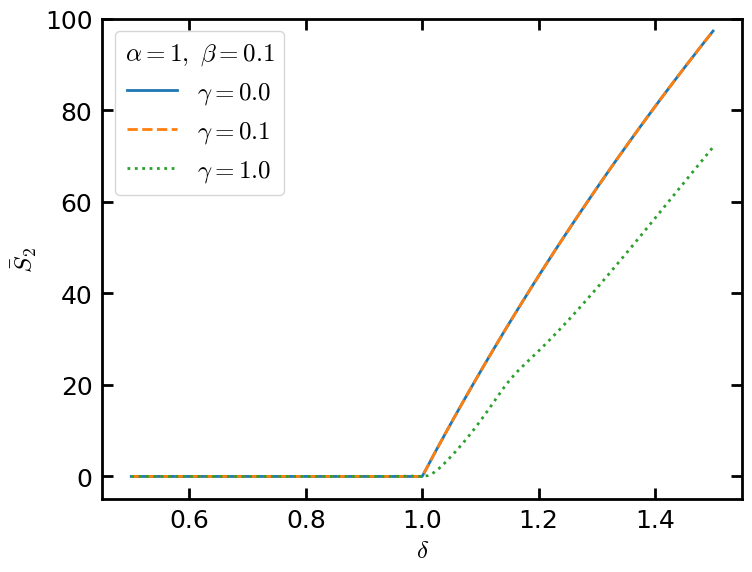

In [240]:
plt.figure(5)
g_ind = 0
plt.plot(grid_pert['delta_vals'], grid_pert['s2'][g_ind,:], label="$\\gamma = {}$".format(grid_pert['gamma_vals'][g_ind]), ls="-",zorder=0)
g_ind = 10
plt.plot(grid_pert['delta_vals'], grid_pert['s2'][g_ind,:], label="$\\gamma = {}$".format(grid_pert['gamma_vals'][g_ind]), ls="--",zorder=1)
g_ind = 100
plt.plot(grid_pert['delta_vals'], grid_pert['s2'][g_ind,:], label="$\\gamma = {}$".format(grid_pert['gamma_vals'][g_ind]), ls=":",zorder=2)
plt.ylim(top=100)
plt.xlabel("$\\delta$")
plt.ylabel("$\\bar{S}_2$")
plt.legend(title="$\\alpha=1,\ \\beta=0.1$")
nice_ticks()

plt.savefig("figures/s2_vs_delta_pert.pdf")

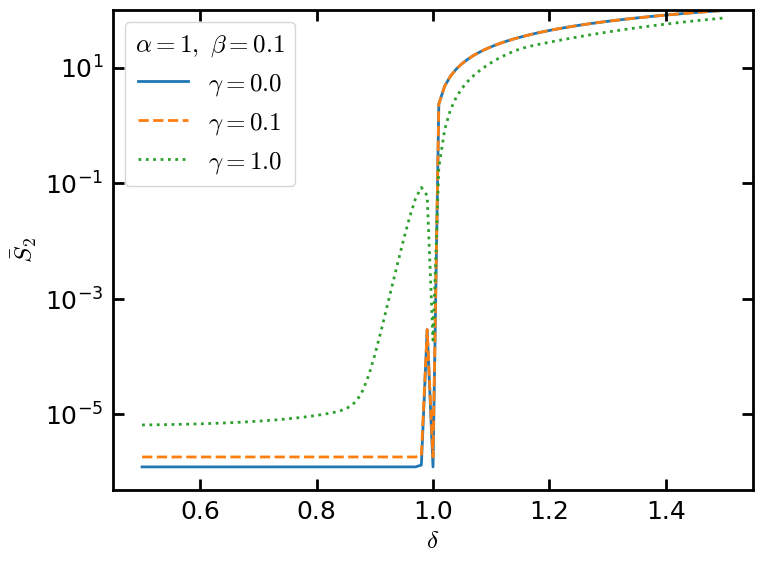

In [6]:
plt.figure(5)
g_ind = 0
plt.semilogy(grid_pert['delta_vals'], grid_pert['s2'][g_ind,:], label="$\\gamma = {}$".format(grid_pert['gamma_vals'][g_ind]), ls="-",zorder=0)
g_ind = 10
plt.semilogy(grid_pert['delta_vals'], grid_pert['s2'][g_ind,:], label="$\\gamma = {}$".format(grid_pert['gamma_vals'][g_ind]), ls="--",zorder=1)
g_ind = 100
plt.semilogy(grid_pert['delta_vals'], grid_pert['s2'][g_ind,:], label="$\\gamma = {}$".format(grid_pert['gamma_vals'][g_ind]), ls=":",zorder=2)
plt.ylim(top=100)
plt.xlabel("$\\delta$")
plt.ylabel("$\\bar{S}_2$")
plt.legend(title="$\\alpha=1,\ \\beta=0.1$")
nice_ticks()

# plt.savefig("figures/s2_vs_delta_pert.pdf")